<a href="https://colab.research.google.com/github/Breiniac87/Data_Sciense/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

# from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
tit = pd.read_csv('train.csv')
tit

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
# проверяем пропущ значения
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = tit.drop(['PassengerId', 'Survived', 'Name', 'Ticket','Cabin'], axis=1) #delete trash
X = pd.get_dummies(X) #преобразовывем пол из мж в 1 и 0 и прочие столбцы которые функция может найти
X

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1      0   7.2500           0         1           0   
1         1  38.0      1      0  71.2833           1         0           1   
2         3  26.0      0      0   7.9250           1         0           0   
3         1  35.0      1      0  53.1000           1         0           0   
4         3  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886       2  27.0      0      0  13.0000           0         1           0   
887       1  19.0      0      0  30.0000           1         0           0   
888       3   NaN      1      2  23.4500           1         0           0   
889       1  26.0      0      0  30.0000           0         1           1   
890       3  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 10 columns]

In [ ]:
y = tit.Survived

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
Дерево решений не умеет работать с пропущенными значениями, проанализируем возраст и будем заполнять медианным значением

In [ ]:
# проверяем пропущ значения
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X.Age.median()

28.0

In [ ]:
X = X.fillna({'Age': X.Age.median()}) #Заполняем возраст медианой

In [ ]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
И теперь обучаем дерево через энтропию

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

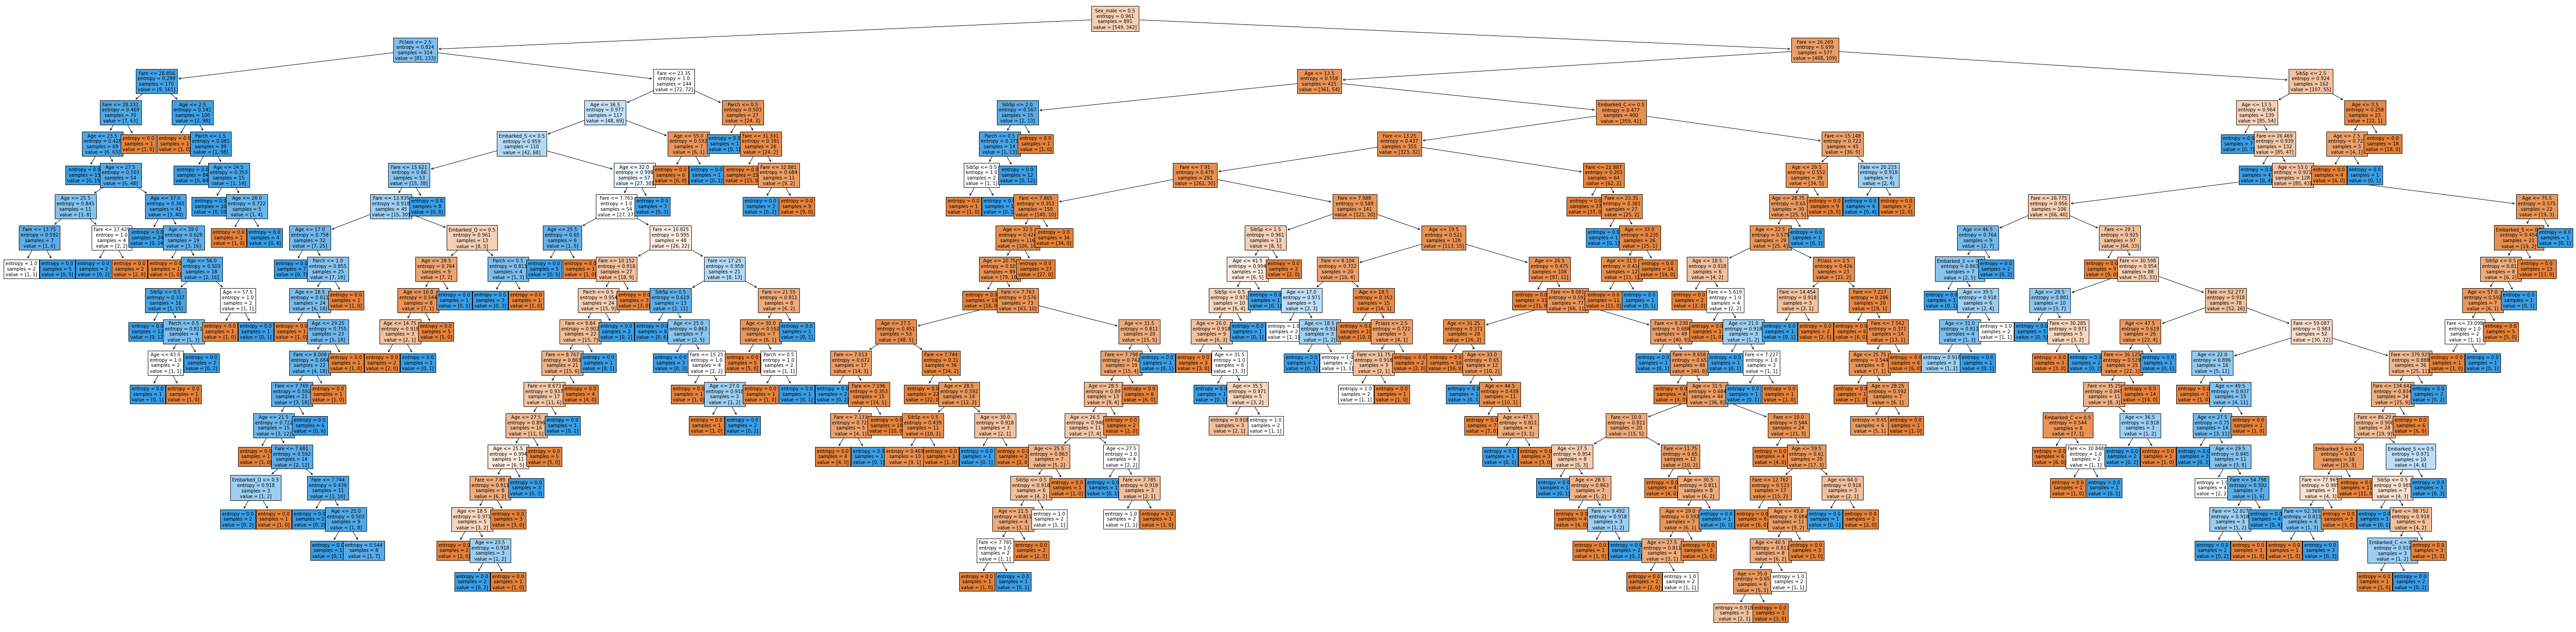

In [ ]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

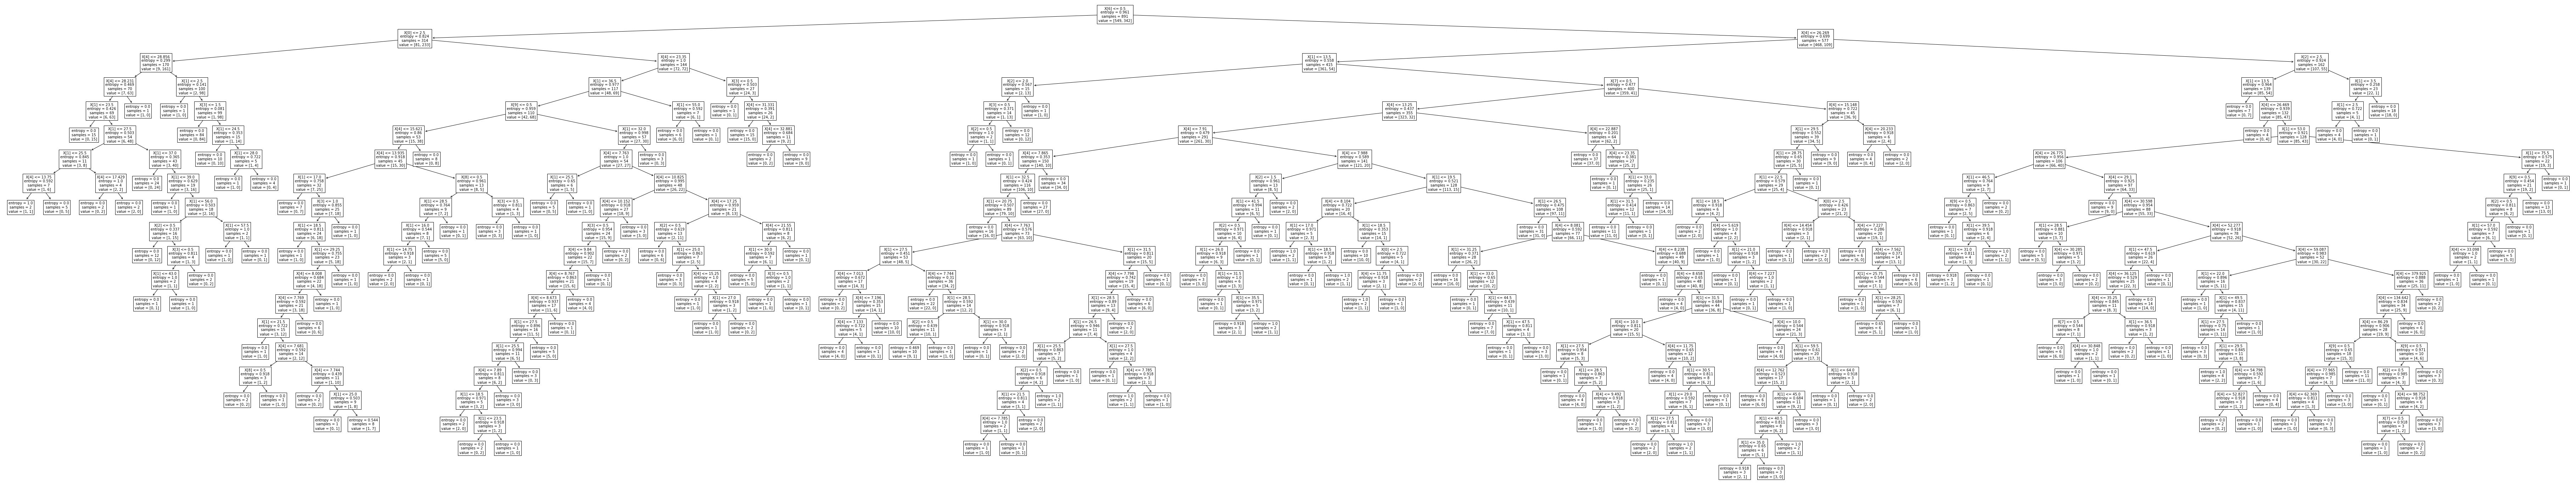

In [ ]:
plt.figure(figsize=(130, 25))
tree.plot_tree(clf)
plt.show()

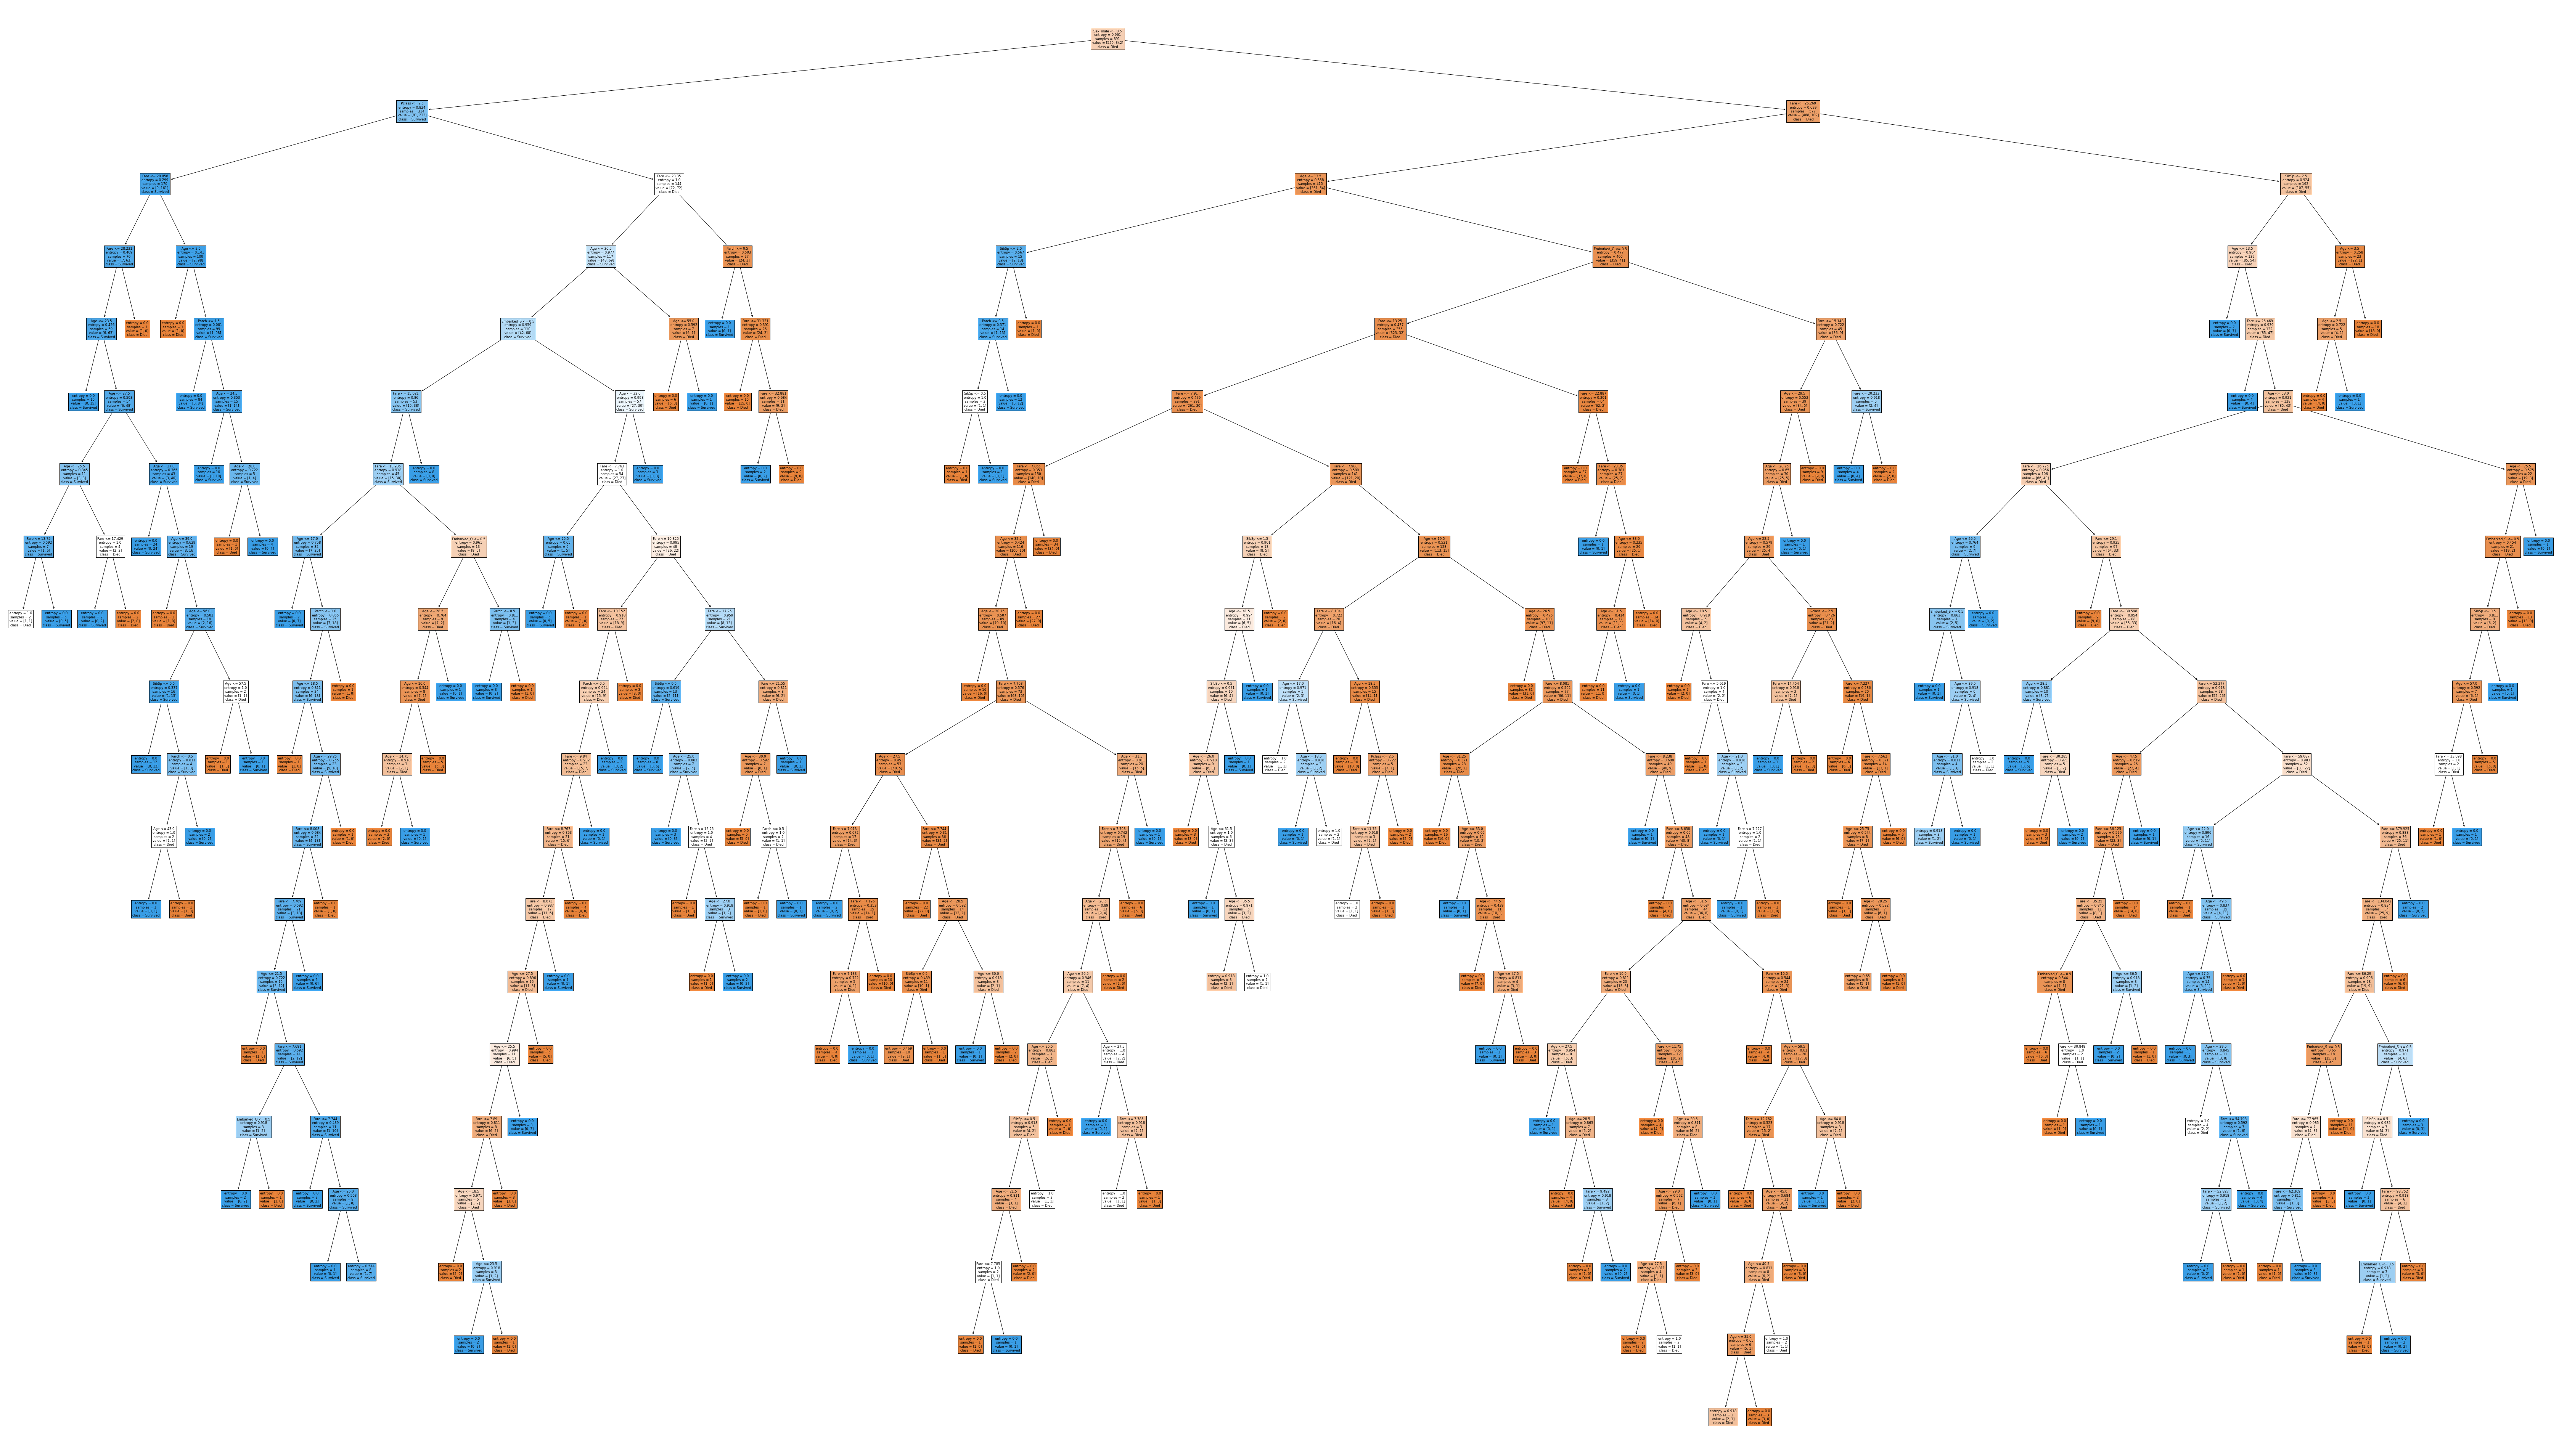

In [ ]:
plt.figure(figsize=(120, 70))
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

# получили какую то нереальную хрень, тк пока энтропия не дойдет до нуля дерево будет сплититься. потому и растет.
Это называется overfitting , Нужно ограничивать количество сплитов

# нужно дерево обучать на одном наборе данных и тестировать на другом, сравнить предсказанные знач и реальные.
короче поможет подбор параметров,

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # 30% to test

In [ ]:
X_train.shape # count on train size

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
clf.score(X, y) #предсказывает число правильных ответов. тоесть в 97% случаев правильно классифицировали все наблюдения

0.9797979797979798

In [ ]:
проверяем точность на обучающем множестве

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.score(X_test, y_test)

0.7728813559322034

# видим что на тестовом датасете больше ошибок с предсказание утонули пасс или выжили

# это скорее всего изза того что дерево переобучено сильно.

In [ ]:
итак ограничиваем дерево и обучим

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
clf.score(X_train, y_train) #check score стало хуже

0.8406040268456376

In [ ]:
clf.score(X_test, y_test) #check score стало лучше

0.8067796610169492

# пробуем подобрать глубину в ручную но есть в СКЛерн метод который сам подбирает.

In [ ]:
max_depth_values = range(1,100)

In [ ]:
scores_data = pd.DataFrame() #create empty DF

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= max_depth)
    clf.fit(X_train, y_train)
    trainScore = clf.score(X_train, y_train)
    testScore = clf.score(X_test, y_test)

    tmp_scores_data = pd.DataFrame({'max_depth': [max_depth],
                                    'trainScore':[trainScore],
                                    'testScore':[testScore]}) # []задаем только одно значение а не список
    scores_data = scores_data.append(tmp_scores_data)

# цикл обучил 99 деревьев , предсказал значения набл на тест и трейн и сохранил точность

In [ ]:
scores_data.head()

max_depth  trainScore  testScore
0          1    0.781879   0.796610
0          2    0.805369   0.776271
0          3    0.823826   0.820339
0          4    0.833893   0.823729
0          5    0.840604   0.806780

In [ ]:
отобрадение таблицы неудобное потому трансформируем ее

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['trainScore', 'testScore'],
                          var_name='Тип выборки', value_name='Вероятность в %')

In [ ]:
scores_data_long.head()

max_depth Тип выборки  Вероятность в %
0          1  trainScore         0.781879
1          2  trainScore         0.805369
2          3  trainScore         0.823826
3          4  trainScore         0.833893
4          5  trainScore         0.840604

In [ ]:
теперь нарисуем это

<AxesSubplot:xlabel='max_depth', ylabel='Вероятность в %'>

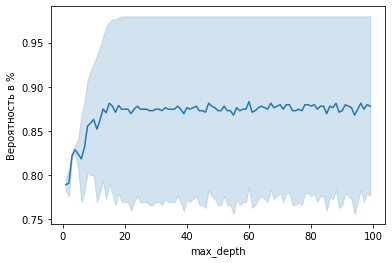

In [ ]:
sns.lineplot(x='max_depth', y='Вероятность в %',data=scores_data_long)

In [ ]:
с увел глуб мы лучше класс сет обучения.
с увеличение трейн тест снижается

# тестовая трейн выборка обучается на одном и том же наборе данных и нужно перетасовать данные(кроссвалидация)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 4)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=5) #cv = how much fold разбиваем множество

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [ ]:
5 знач это точно кот показ классифик когда разбил на 5 кусков и обучучился на 4-х и предсказал пятый, потом 1235 и предказал 4